In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib
%matplotlib inline

Using matplotlib backend: Qt5Agg


In [7]:
sns.set(style='whitegrid')

In [8]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### univariate

In [13]:
df['target'].nunique()

2

In [16]:
df['target'].unique()

array([1, 0], dtype=int64)

In [19]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

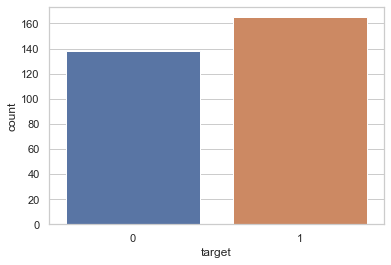

In [23]:
fig , ax = plt.subplots()
ax = sns.countplot(x='target',data=df)
plt.show()

In [24]:
df['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

In [26]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

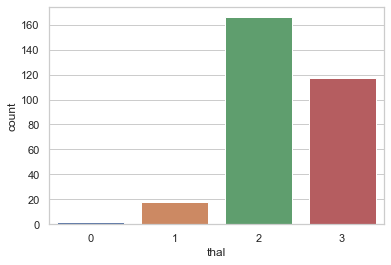

In [30]:
fig, ax = plt.subplots()
ax = sns.countplot(x='thal',data=df)

### relation bw 2 variables

In [37]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

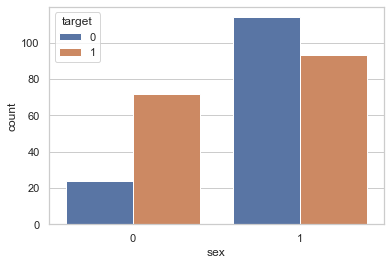

In [39]:
sns.countplot(x='sex',hue='target',data=df)

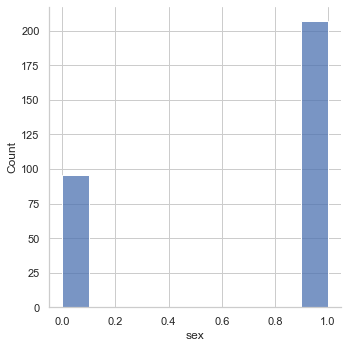

In [51]:
sns.displot(df['sex'],bins=10)

### bivariate

In [42]:
corelation = df.corr()

In [46]:
corelation['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

<AxesSubplot:xlabel='cp', ylabel='count'>

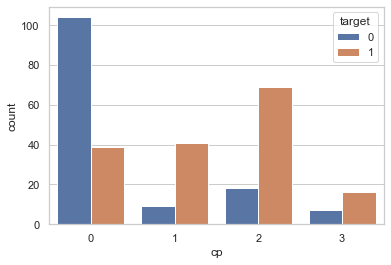

In [49]:
sns.countplot(x='cp',hue='target',data=df)

In [57]:
df['thalach'].value_counts()

162    11
163     9
160     9
152     8
173     8
       ..
128     1
129     1
134     1
137     1
202     1
Name: thalach, Length: 91, dtype: int64

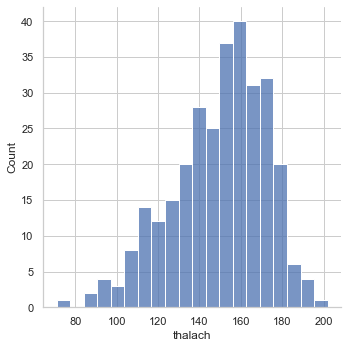

In [59]:
sns.displot(df['thalach'],bins=20)

<AxesSubplot:xlabel='thalach', ylabel='Count'>

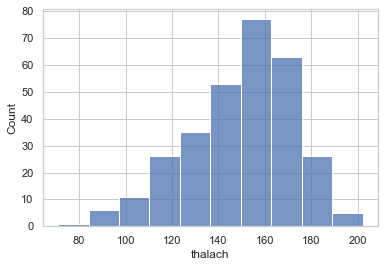

In [66]:
sns.histplot(df['thalach'],bins=10)

<AxesSubplot:xlabel='target', ylabel='thalach'>

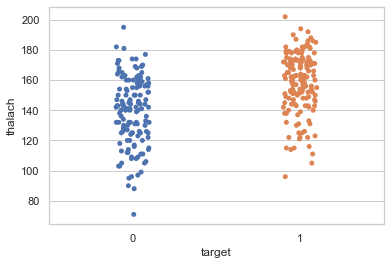

In [61]:
sns.stripplot(y='thalach',x='target',data=df)

<AxesSubplot:xlabel='target', ylabel='chol'>

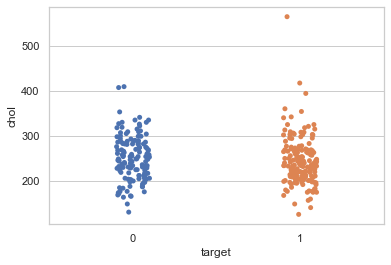

In [62]:
sns.stripplot(y='chol',x='target',data=df)

<AxesSubplot:xlabel='target', ylabel='trestbps'>

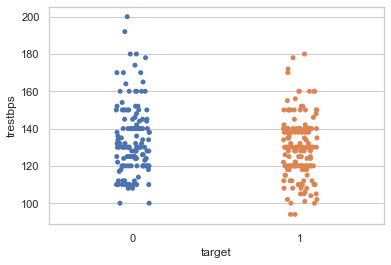

In [68]:
sns.stripplot(x='target',y='trestbps',data=df)

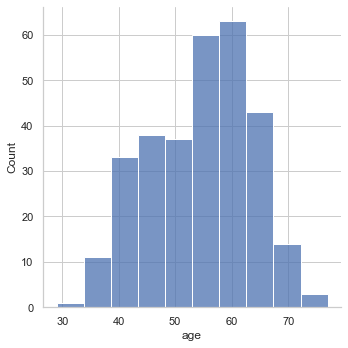

In [70]:
sns.displot(df['age'],bins=10)

<AxesSubplot:xlabel='target', ylabel='age'>

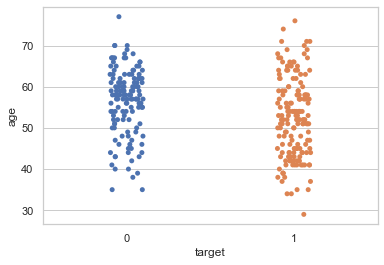

In [73]:
sns.stripplot(x='target',y='age',data=df)